# Code

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
# Dataset: https://www.kaggle.com/datasets/msambare/fer2013
train_dir = r"FER2013_Training_Data" # Directory containing the training data
test_dir = r"FER2013_Testing_Data"  # Directory containing the validation data

In [3]:
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

          0    1     2     3     4     5     6
train  3995  436  4097  7215  4830  3171  4965
        0    1     2     3     4    5     6
test  958  111  1024  1774  1247  831  1233


<Axes: >

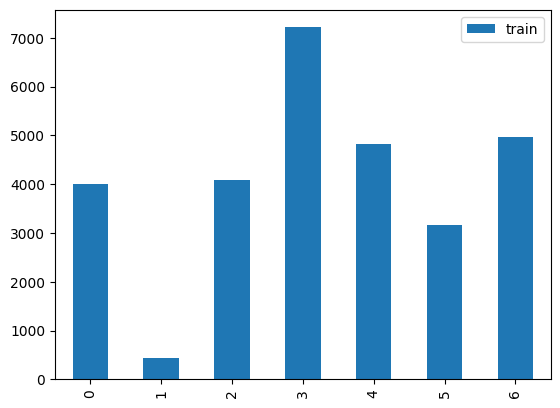

In [4]:
train_count.transpose().plot(kind='bar')

<Axes: >

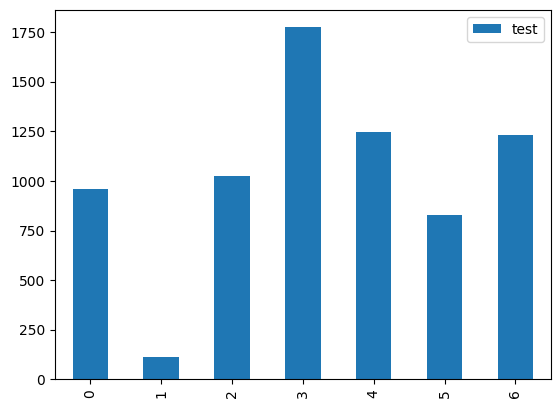

In [5]:
test_count.transpose().plot(kind='bar')

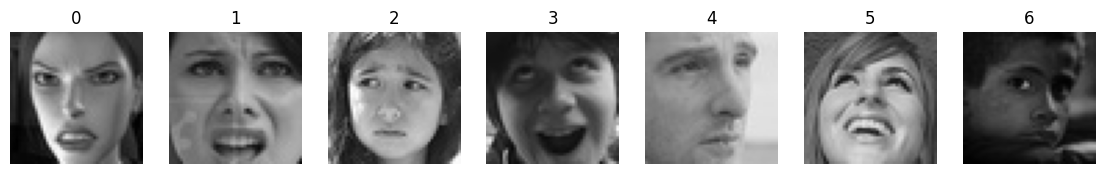

In [6]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [9]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.models import Sequential
import tensorflow as tf 

from tensorflow.keras.regularizers import l2

# Define the model architecture with L2 regularization
model = Sequential()

# Add a convolutional layer with L2 regularization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

C:\Users\mafaz\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


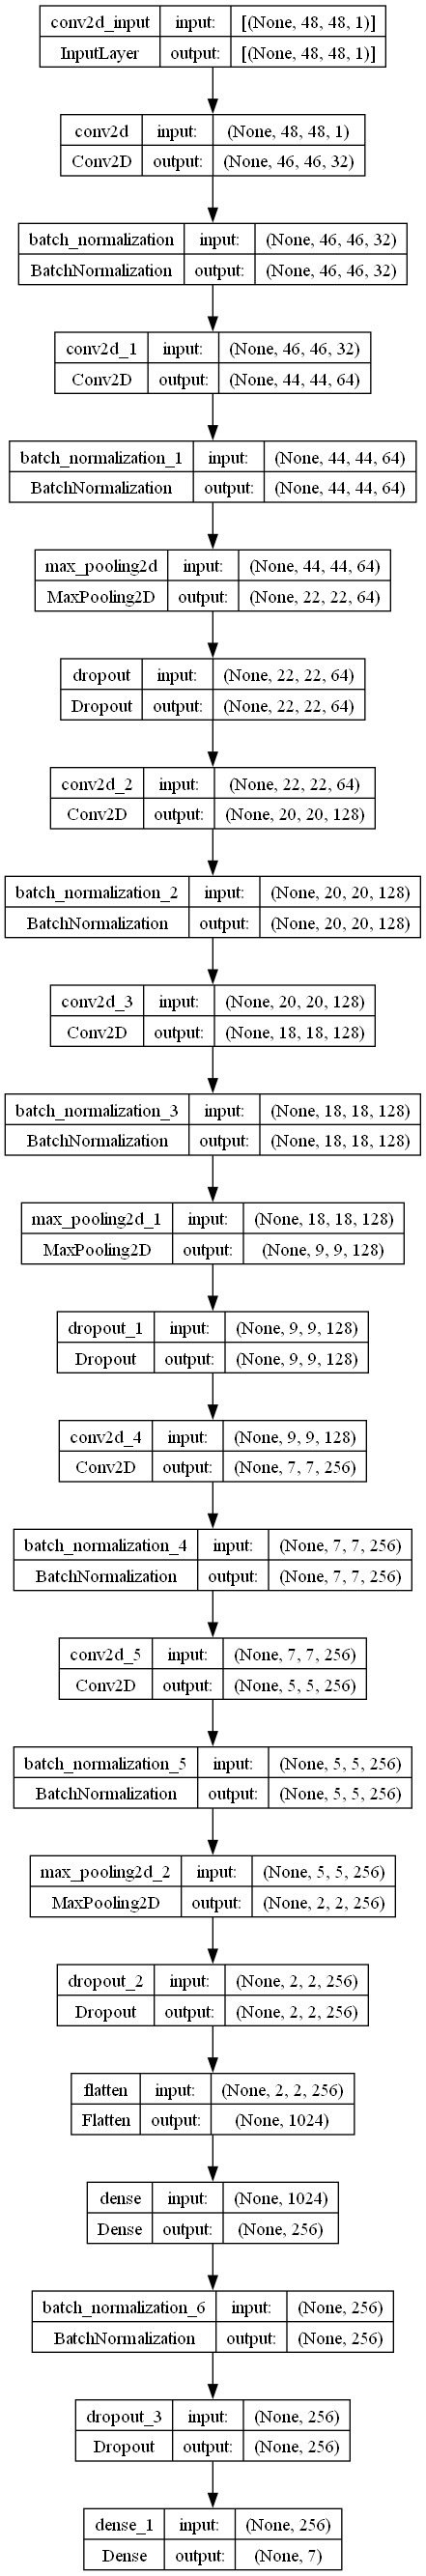

In [10]:
# Plot the model and save the image
plot_model(model, to_file='FER_baseline.png', show_shapes=True, show_layer_names=True)

In [11]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=25,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore the weights of the best epoch
    verbose=1
)

tf.debugging.set_log_device_placement(True)
# Train the model with both callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping_callback]  # Include early stopping callback
)

Epoch 1/100
359/359 [==============================] - ETA: 0s - loss: 13.4555 - accuracy: 0.1852
Epoch 1: val_accuracy improved from -inf to 0.15922, saving model to model_weights.weights.h5
359/359 [==============================] - 398s 1s/step - loss: 13.4555 - accuracy: 0.1852 - val_loss: 12.3655 - val_accuracy: 0.1592
Epoch 2/100
359/359 [==============================] - ETA: 0s - loss: 12.3336 - accuracy: 0.2164
Epoch 2: val_accuracy improved from 0.15922 to 0.33939, saving model to model_weights.weights.h5
359/359 [==============================] - 17s 46ms/step - loss: 12.3336 - accuracy: 0.2164 - val_loss: 11.2670 - val_accuracy: 0.3394
Epoch 3/100
358/359 [============================>.] - ETA: 0s - loss: 11.2779 - accuracy: 0.2644
Epoch 3: val_accuracy improved from 0.33939 to 0.37570, saving model to model_weights.weights.h5
359/359 [==============================] - 18s 49ms/step - loss: 11.2764 - accuracy: 0.2642 - val_loss: 10.3815 - val_accuracy: 0.3757
Epoch 4/100
35

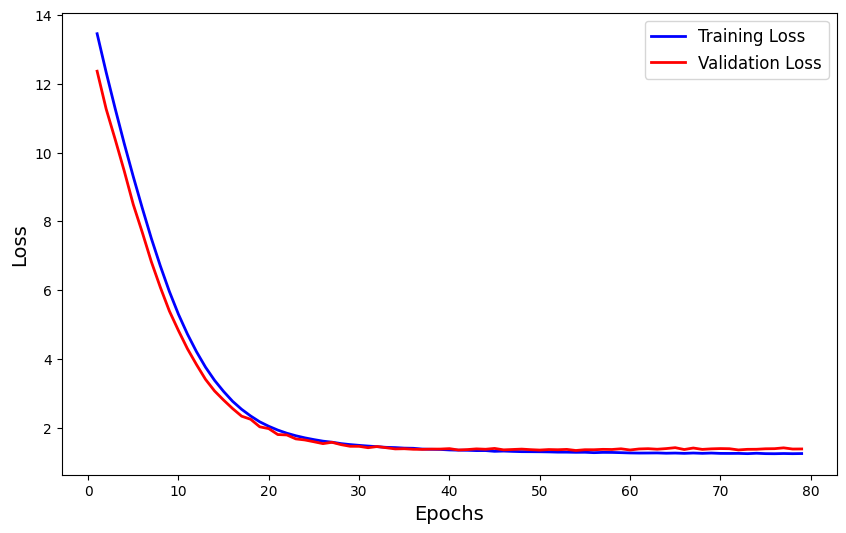

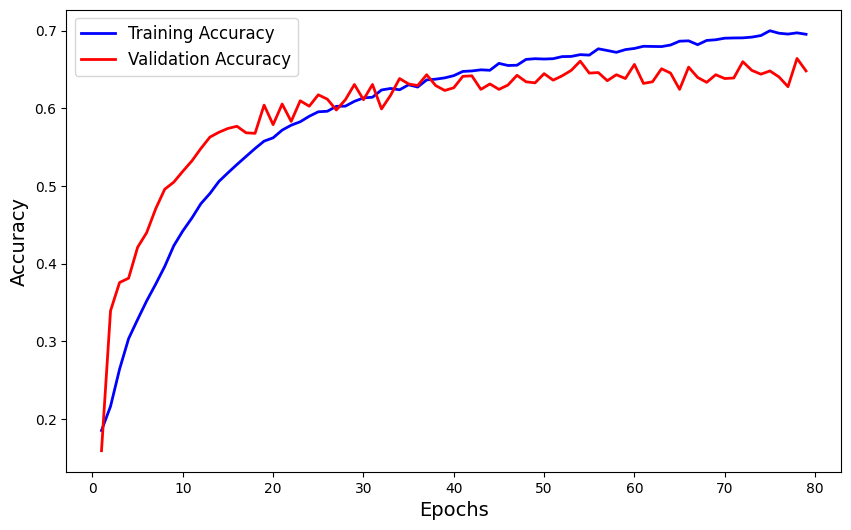

In [13]:
import matplotlib.pyplot as plt

# Assuming you have 'history' from model.fit()
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Define the number of epochs based on the length of the training loss list
epochs = range(1, len(train_loss) + 1)

# Plot the train and validation loss
plt.figure(figsize=(10, 6), facecolor='white')  # Set the figure background to white
ax = plt.gca()  # Get current axis
ax.set_facecolor('white')  # Set the axis background to white

# Ensure axis lines and labels are visible
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2, markersize=6)
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
# plt.savefig('training_validation_loss_baseline_advanced_l2.png', dpi=300)  # Save with higher DPI
plt.show()

# Plot the train and validation accuracy
plt.figure(figsize=(10, 6), facecolor='white')  # Set the figure background to white
ax = plt.gca()  # Get current axis
ax.set_facecolor('white')  # Set the axis background to white

# Ensure axis lines and labels are visible
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
# plt.savefig('training_validation_accuracy_baseline_advanced_l2.png', dpi=300)  # Save with higher DPI
plt.show()

23/23 [==============================] - 1s 30ms/step


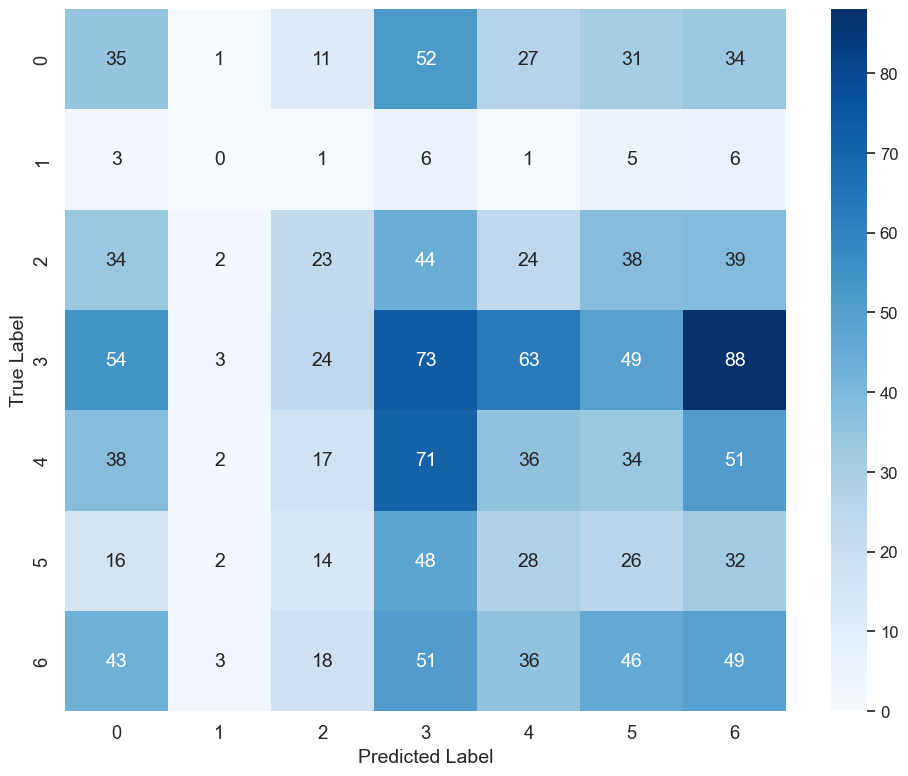

In [14]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())

# Plot the confusion matrix with a color bar
plt.figure(figsize=(10, 8))  # Increase figure size for better readability
sns.set(font_scale=1.2)  # Increase font scale for labels
heatmap = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
                      xticklabels=class_names, yticklabels=class_names, cbar=True, 
                      annot_kws={"size": 14})

# Add color bar for legend
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Set color bar tick size

# Adding titles and labels with increased font size for better presentation
# plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Save the figure with high DPI for better quality
plt.tight_layout()  # Adjust the layout to ensure everything fits without overlap
#plt.savefig('confusion_matrix_with_colorbar_l2.png', dpi=300)
plt.show()

23/23 [==============================] - 1s 21ms/step


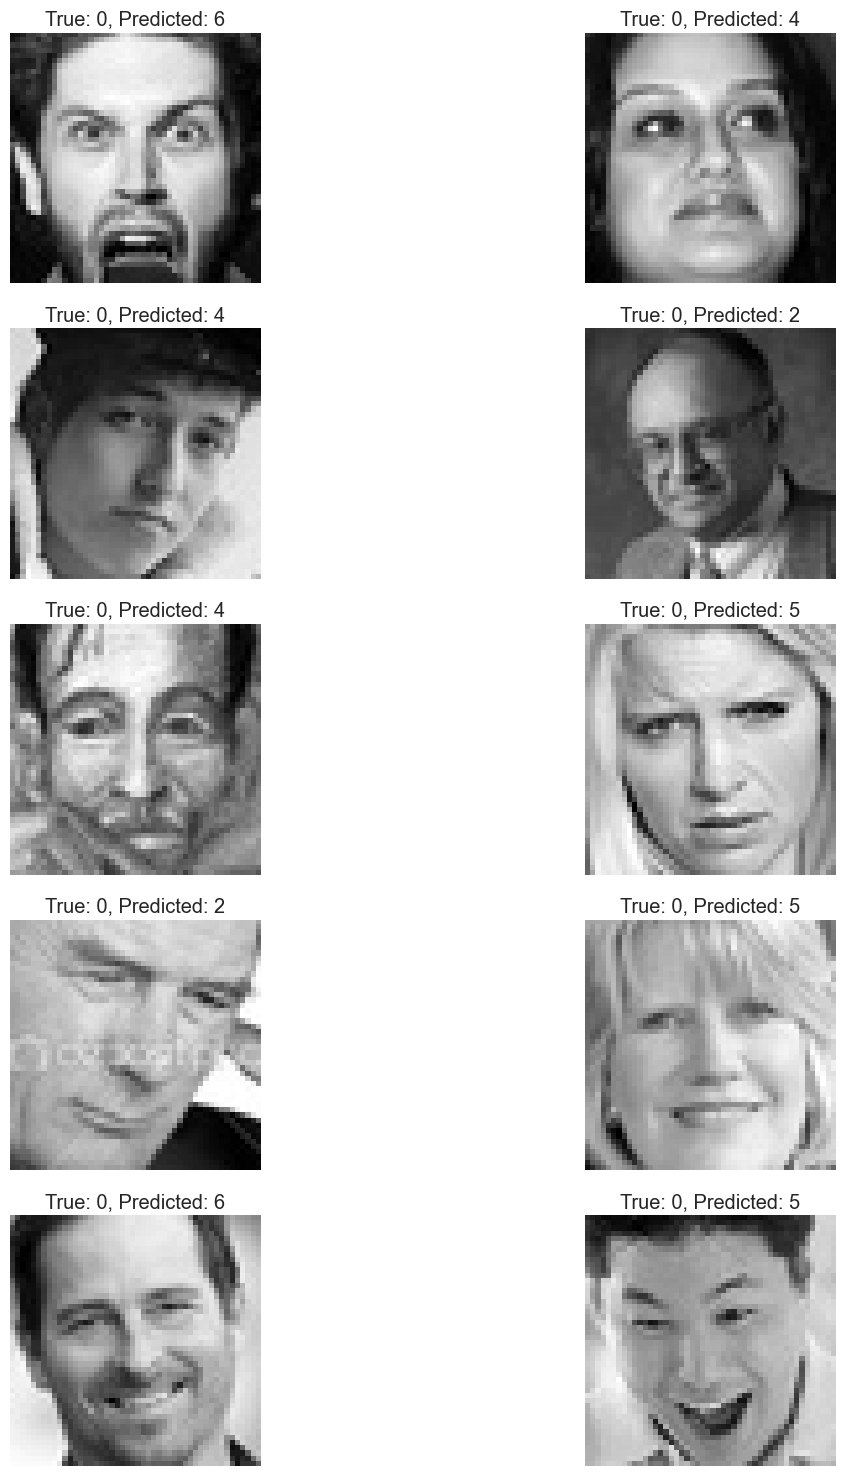

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

# Assuming you have validation data and model predictions
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Find the indices where predictions do not match the actual labels
misclassified_indices = np.where(validation_pred_labels != validation_labels)[0]

# Display some misclassified images
def plot_misclassified_images(generator, misclassified_indices, validation_pred_labels, validation_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(5, 2, i + 1)
        img, label = generator[index]
        plt.imshow(img[0], cmap='gray')
        plt.title(f"True: {class_names[validation_labels[index]]}, Predicted: {class_names[validation_pred_labels[index]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(validation_generator, misclassified_indices, validation_pred_labels, validation_labels, class_names)

23/23 [==============================] - 1s 23ms/step


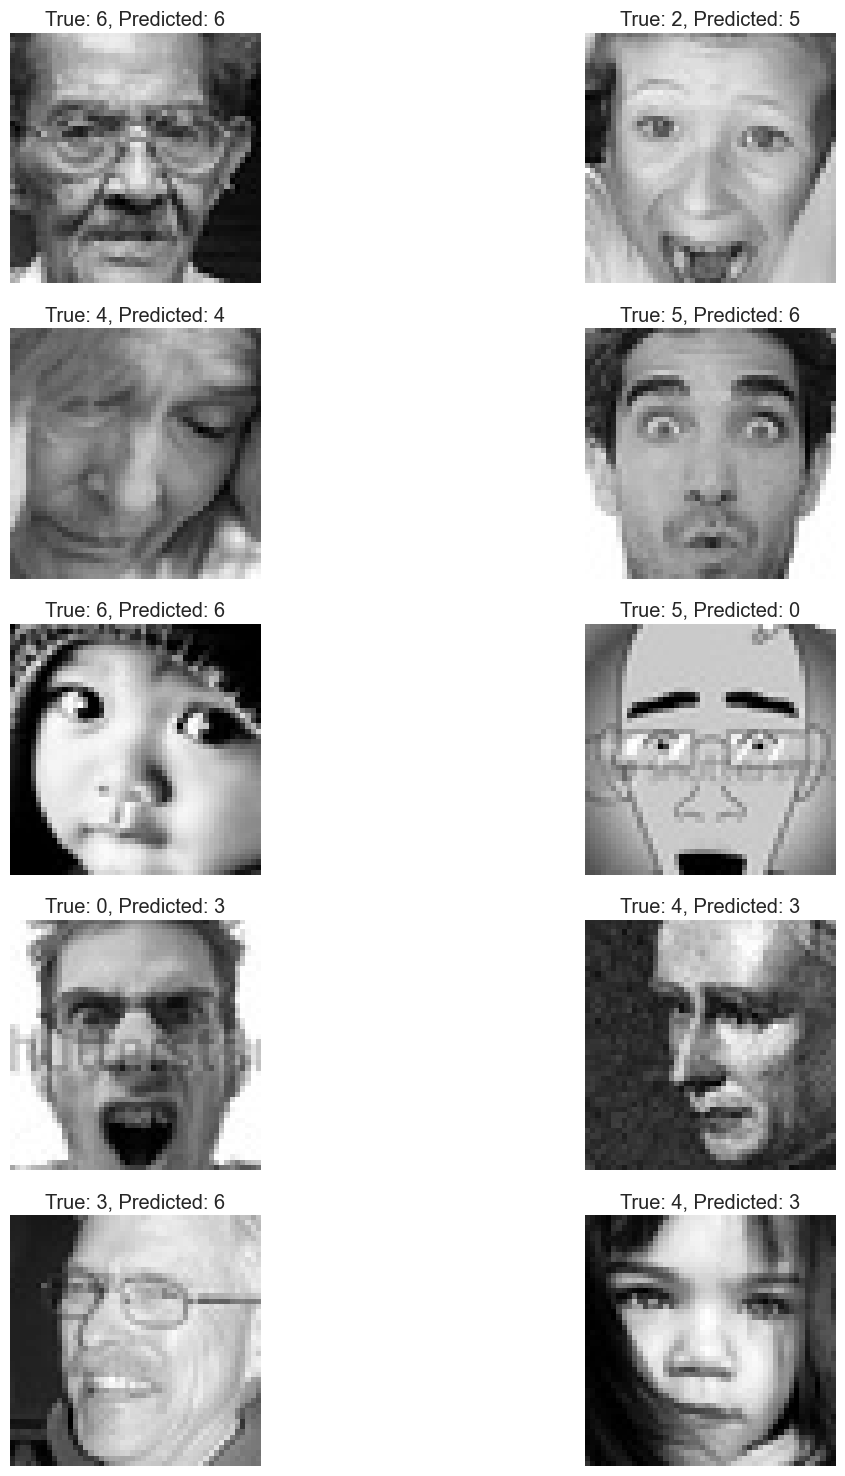

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have validation data and model predictions
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator, verbose=1)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Find the indices where predictions do not match the actual labels
misclassified_indices = np.where(validation_pred_labels != validation_labels)[0]

# Get all images and true labels from the generator
validation_images = []
validation_labels_from_generator = []
for i in range(len(validation_generator)):
    imgs, labels = validation_generator[i]
    validation_images.append(imgs)
    validation_labels_from_generator.append(labels)

validation_images = np.vstack(validation_images)
validation_labels_from_generator = np.argmax(np.vstack(validation_labels_from_generator), axis=1)

# Display misclassified images from various classes
def plot_misclassified_images(validation_images, misclassified_indices, validation_pred_labels, validation_labels_from_generator, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    random_indices = np.random.choice(misclassified_indices, size=num_images, replace=False)
    for i, index in enumerate(random_indices):
        plt.subplot(5, 2, i + 1)
        img = validation_images[index]
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {class_names[validation_labels_from_generator[index]]}, Predicted: {class_names[validation_pred_labels[index]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(validation_images, misclassified_indices, validation_pred_labels, validation_labels_from_generator, class_names)


In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set shuffle=False to ensure that the predictions and true labels align correctly
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,            
    target_size=(48, 48),          
    batch_size=64,                 
    color_mode="grayscale",        
    class_mode="categorical",      
    shuffle=False                  # IMPORTANT: Avoid shuffling for consistent labels
)

# Get the true labels from the generator
validation_labels = validation_generator.classes

# Predict the probabilities of the validation set
validation_pred_probs = model.predict(validation_generator, verbose=1)

# Get the predicted labels (highest probability class)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Ensure the order of predictions matches the order of labels
assert len(validation_labels) == len(validation_pred_labels), "Mismatch between labels and predictions"

# Generate the classification report
class_names = list(train_generator.class_indices.keys())
report = classification_report(validation_labels, validation_pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:")
print(report)

# Optionally, print confusion matrix
conf_matrix = confusion_matrix(validation_labels, validation_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

Found 7178 images belonging to 7 classes.
113/113 [==============================] - 41s 369ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.61      0.56       958
           1       0.61      0.36      0.45       111
           2       0.53      0.29      0.38      1024
           3       0.88      0.83      0.85      1774
           4       0.55      0.47      0.51      1247
           5       0.63      0.86      0.73       831
           6       0.56      0.70      0.62      1233

    accuracy                           0.63      7178
   macro avg       0.61      0.59      0.58      7178
weighted avg       0.64      0.63      0.62      7178

Confusion Matrix:
[[ 584   16   53   32   93   53  127]
 [  48   40    4    4   10    3    2]
 [ 182    6  301   25  185  197  128]
 [  56    1   20 1469   38   65  125]
 [ 155    3  109   62  580   51  287]
 [  27    0   27   31   13  718   15]
 [  82    0   52   50  128   60  8

In [40]:
import time
import numpy as np

# Reset the generator to ensure it starts from the beginning
validation_generator.reset()

# Get a single batch of images
batch = next(validation_generator)

# Pick one image and its label from the batch
single_image = batch[0][0].reshape(1, 48, 48, 1)  # Reshape to match input shape (1 image, 48x48 pixels, grayscale)

# Start the timer
start_time = time.time()

# Make a prediction for the single image
single_pred_prob = model.predict(single_image)

# Stop the timer
end_time = time.time()

# Calculate the inference time for a single image
single_image_inference_time = end_time - start_time

# Print the result
print(f"Inference time for a single image: {single_image_inference_time:.6f} seconds")

1/1 [==============================] - 0s 30ms/step
Inference time for a single image: 0.095373 seconds


In [27]:
import numpy as np

# Reset the generator to ensure it starts from the beginning
validation_generator.reset()

# Get the number of samples in the validation set
num_validation_samples = len(validation_generator.filenames)

# Calculate the number of iterations/batches needed
batch_size = validation_generator.batch_size
num_batches = np.ceil(num_validation_samples / batch_size)

# Initialize arrays to store images and labels
validation_images = []
validation_labels = []

# Iterate through the generator and collect all images and labels
for i in range(int(num_batches)):
    imgs, labels = validation_generator.next()
    validation_images.append(imgs)
    validation_labels.append(labels)

# Concatenate all batches
validation_images = np.vstack(validation_images)
validation_labels = np.vstack(validation_labels)

# Convert one-hot labels to single integers
validation_labels_int = np.argmax(validation_labels, axis=1)


In [24]:
# Make predictions
validation_pred_probs = model.predict(validation_images)

# Convert probabilities to class labels
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)


225/225 [==============================] - 1s 4ms/step


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Get class names
class_names = list(validation_generator.class_indices.keys())

# Compute classification report
report = classification_report(validation_labels_int, validation_pred_labels, target_names=class_names, digits=4)

# Print classification report
print("Classification Report:")
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(validation_labels_int, validation_pred_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0     0.5033    0.6367    0.5622       958
           1     0.5507    0.3423    0.4222       111
           2     0.5311    0.3252    0.4034      1024
           3     0.8490    0.8557    0.8523      1774
           4     0.5424    0.4924    0.5162      1247
           5     0.7123    0.8135    0.7596       831
           6     0.5796    0.6586    0.6166      1233

    accuracy                         0.6410      7178
   macro avg     0.6098    0.5892    0.5903      7178
weighted avg     0.6375    0.6410    0.6333      7178

Confusion Matrix:
[[ 610   15   69   24  116   30   94]
 [  51   38    7    3    6    4    2]
 [ 179    6  333   42  186  146  132]
 [  66    2   15 1518   46   35   92]
 [ 166    3  116   73  614   31  244]
 [  33    1   37   46   13  676   25]
 [ 107    4   50   82  151   27  812]]


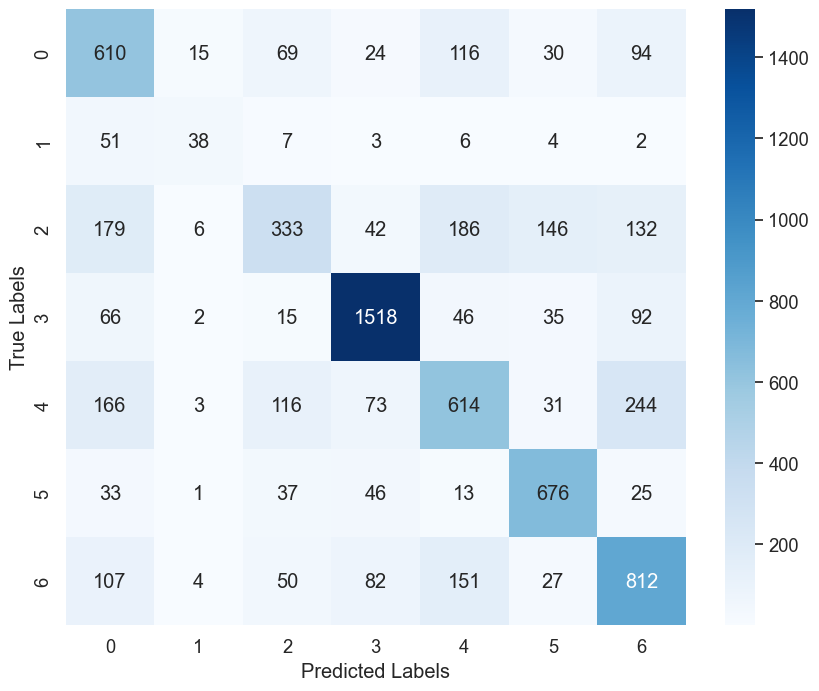

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
# plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_with_colorbar_l2_2.png', dpi=300)
plt.show()